# Project: Customer Segmentation
Analysis customer behavior and segment customer based on purchasing behavior, and provide actionable Insights. 

# Table of Contents
1. [Data Cleaning & EDA](#data-cleaning-eda)
2. [Feature Engineering](#feature-engineering)
3. [Clustering Using K-Means](#clustering-using-k-menas)
4. [Feature Analysis, Conclusion, and Actionable Insight](#feature-analysis-conclusion-and-actionable-insight)


# Data Cleaning & EDA

**Variable and Description:**
- InvoiceNo: It representing each unique transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Unique code for each distinct product.
- Description: Description of each product.
- Quantity: The number of units of a product in a transaction.
- InvoiceDate: The date and time of the transaction.
- UnitPrice: The unit price of the product in sterling.
- CustomerID: Identifier uniquely assigned to each customer.
- Country: The country of the customer.

## Dataset Overview

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('e-com_data_2010-2011.csv',  encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [105]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Handling Data Types

In [107]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('Int64')

corrected the datatypes. 

## Handling Duplicated Data

In [108]:
df.isnull().sum()   

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**135080 null at CustomerID** I will try to use KNN imputation to solve it. <br>


## Handling Duplicates

In [109]:
print('Dataset contain duplicate rows:', df.duplicated().sum())
df.drop_duplicates(inplace=True)

Dataset contain duplicate rows: 5268


In [110]:
df.duplicated().sum()

0

In [111]:
df.shape

(536641, 8)

## Handling Cancelled Transaction

In [112]:
# create a column that indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].str.startswith('C'), 'Cancelled', 'Completed')

#Take a look at cancelled transactions
df[df['Transaction_Status'] == 'Cancelled'].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,9251.000000,9251,9251.000000,8872.0
mean,-29.787050,2011-06-26 07:06:45.231866880,48.570430,14990.152953
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.0
25%,-6.000000,2011-03-21 16:26:00,1.450000,13505.0
50%,-2.000000,2011-07-08 13:04:00,2.950000,14868.0
75%,-1.000000,2011-10-06 20:36:00,5.950000,16393.0
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.0
std,1147.997592,NaN,667.926393,1708.230387


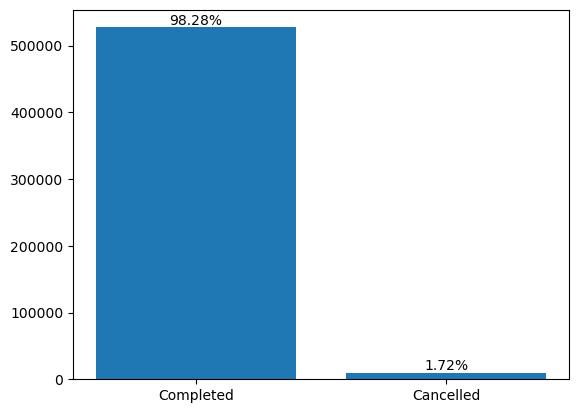

In [113]:
plt.bar(df['Transaction_Status'].value_counts().index, df['Transaction_Status'].value_counts().values)
percentages = df['Transaction_Status'].value_counts(normalize=True) * 100
for status, percentage in percentages.items():
    count = df['Transaction_Status'].value_counts()[status]
    plt.text(status, count, f'{percentage:.2f}%', ha='center', va='bottom')
plt.show()

1.72% of the cancelled transaction seems normal.

## Look into StockCode


The number of unique stock code: 4070


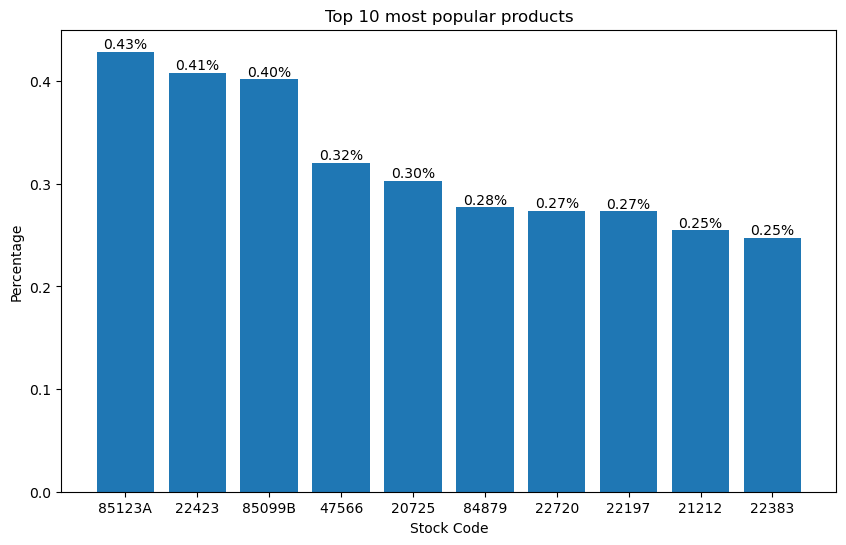

In [114]:
print('The number of unique stock code:', df['StockCode'].nunique())  

top_10_stock = df['StockCode'].value_counts(normalize=True).head(10) *100
plt.figure(figsize=(10, 6))
plt.bar(top_10_stock.index, top_10_stock.values)

for index, value in enumerate(top_10_stock):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')  

plt.title('Top 10 most popular products')
plt.ylabel('Percentage')
plt.xlabel('Stock Code')
plt.show()

In [115]:
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print("Vlue counts of numerical charaters in unique stock codes:")
print(numeric_char_counts_in_unique_codes)

Vlue counts of numerical charaters in unique stock codes:
5    4037
4      14
0      13
6       5
1       1
Name: count, dtype: int64


From the value count, we can see that most of the stock codes are form as 5 numerical character, and maybe stock code which not 5 contain 5 numerical charaters is a typo.

In [116]:
anomilous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in(0,4)]

for code in anomilous_stock_codes:
    print(code)

POST
D
DOT
M
BANK CHARGES
S
AMAZONFEE
DCGS0076
DCGS0003
DCGS0070
m
DCGS0055
DCGS0072
DCGS0074
DCGS0069
DCGS0057
DCGSSBOY
DCGSSGIRL
PADS
DCGS0004
DCGS0073
DCGS0071
DCGS0068
DCGS0067
DCGS0066P
B
CRUK


In [117]:
anomilous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) == 6]

for code in anomilous_stock_codes:
    print(code)

gift_0001_40
gift_0001_50
gift_0001_30
gift_0001_20
gift_0001_10


In [118]:
# First look into the 6 numerical digit stock codes
df[df['StockCode'].str.contains("gift")].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
163440,550542,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-04-19 11:37:00,16.67,<NA>,United Kingdom,Completed
192071,553389,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:37:00,8.33,<NA>,United Kingdom,Completed
161388,550474,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2011-04-18 13:58:00,16.67,<NA>,United Kingdom,Completed
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,<NA>,United Kingdom,Completed
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,<NA>,United Kingdom,Completed
322164,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,<NA>,United Kingdom,Completed
208808,555149,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-05-31 15:49:00,25.00,<NA>,United Kingdom,Completed
163439,550542,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-04-19 11:37:00,8.33,<NA>,United Kingdom,Completed
297099,562933,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-10 16:51:00,25.00,<NA>,United Kingdom,Completed
536047,581217,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-12-08 09:20:00,8.33,<NA>,United Kingdom,Completed


These gift card are valid transactions. <br>
Let's look into the 4 number stock code.<br>
We know that they are all start with DCGS

In [119]:
anomilous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) == (0,1)]

for code in anomilous_stock_codes:
    print(code)

In [120]:
df[df['StockCode'].str.contains("DCGSS")].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
160487,550458,DCGSSBOY,BOYS PARTY BAG,1,2011-04-18 13:13:00,3.29,<NA>,United Kingdom,Completed
178669,552234,DCGSSBOY,BOYS PARTY BAG,7,2011-05-06 16:01:00,3.29,<NA>,United Kingdom,Completed
128108,547249,DCGSSGIRL,GIRLS PARTY BAG,17,2011-03-22 09:27:00,3.29,<NA>,United Kingdom,Completed
318312,564825,DCGSSGIRL,GIRLS PARTY BAG,1,2011-08-30 12:26:00,3.29,<NA>,United Kingdom,Completed
97246,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.29,<NA>,United Kingdom,Completed
297098,562933,DCGSSGIRL,GIRLS PARTY BAG,5,2011-08-10 16:51:00,3.29,<NA>,United Kingdom,Completed
474602,576840,DCGSSGIRL,GIRLS PARTY BAG,1,2011-11-16 15:23:00,3.29,<NA>,United Kingdom,Completed
278378,561209,DCGSSBOY,BOYS PARTY BAG,2,2011-07-25 16:57:00,1.25,<NA>,United Kingdom,Completed
128269,547250,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-22 09:30:00,3.29,<NA>,United Kingdom,Completed
150864,549524,DCGSSGIRL,GIRLS PARTY BAG,1,2011-04-08 15:42:00,3.29,<NA>,United Kingdom,Completed


These party bags are valid transactions. 
but those single digit, POST, AMAZONFEE, Bank Chage are definitely not valid, so we remove will those. 

In [121]:
anomilous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) == (0,1) and code not in ['DCGSSBOY', 'DCGSSGIRL']]

df = df[~df['StockCode'].isin(anomilous_stock_codes)]

## Description

<BarContainer object of 15 artists>

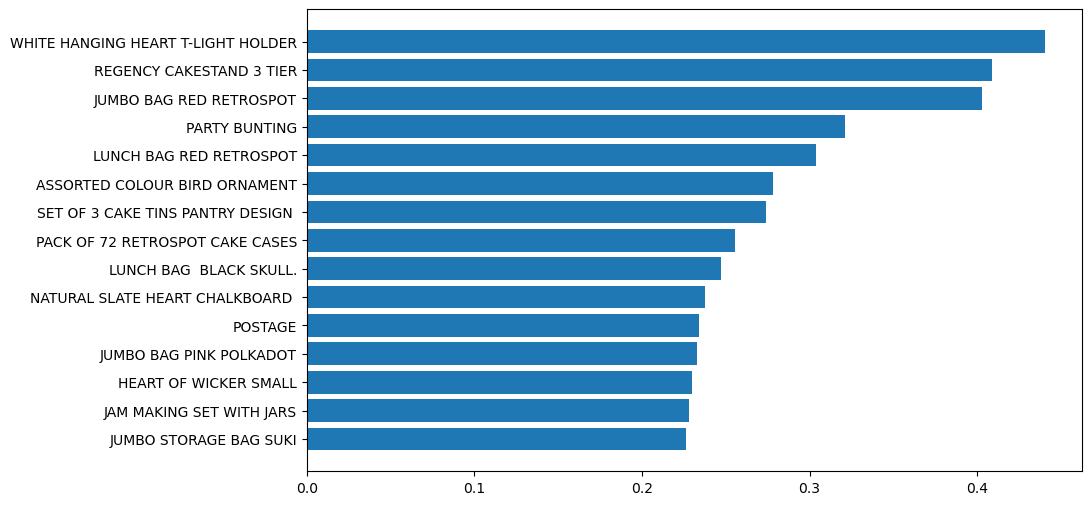

In [122]:
top_15_description = df['Description'].value_counts(normalize=True).head(15) * 100

plt.figure(figsize=(10, 6))
plt.barh(top_15_description.index[::-1], top_15_description.values[::-1])  

So pretty much all of the `Description` is in upper case, any in lowercase?

In [123]:
lowercase_descriptions = df['Description'].str.lower()
print('Number of unique descriptions:', lowercase_descriptions.nunique())

#show some actual lowercase descriptions
lowercase_descriptions.value_counts().head(10)

Number of unique descriptions: 4206


Description
white hanging heart t-light holder    2357
regency cakestand 3 tier              2189
jumbo bag red retrospot               2156
party bunting                         1720
lunch bag red retrospot               1625
assorted colour bird ornament         1488
set of 3 cake tins pantry design      1465
pack of 72 retrospot cake cases       1367
lunch bag  black skull.               1323
natural slate heart chalkboard        1272
Name: count, dtype: int64

In [124]:
# convert those lowercase to uppercase
is_lowercase = df['Description'].apply(lambda x: x.islower() if isinstance(x, str) else False)
df.loc[is_lowercase, 'Description'] = df.loc[is_lowercase, 'Description'].str.upper()

# check if there are any lowercase descriptions left
remaining_lowercase_descriptions = [desc for desc in df['Description'].dropna().unique() if any(char.islower() for char in desc)]
print("Remaining lowercase descriptions:", remaining_lowercase_descriptions)
print("Number of lowercase descriptions after conversion:", len(remaining_lowercase_descriptions))

Remaining lowercase descriptions: ['Discount', 'BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x45cm', 'BAG 125g SWIRLY MARBLES', 'BAG 250g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No', 'Manual', "Dr. Jam's Arouzer Stress Ball", '3 TRADITIONAl BISCUIT CUTTERS  SET', 'Bank Charges', 'NUMBER TILE COTTAGE GARDEN No', 'FOLK ART GREETING CARD,pack/12', 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE', 'POLYESTER FILLER PAD 65CMx65CM', "Dad's Cab Electronic Meter", 'NUMBER TILE VINTAGE FONT No ', '*Boombox Ipod Classic', 'Dotcom sales', '*USB Office Mirror Ball', 'POLYESTER FILLER PAD 30CMx30CM', 'Dotcomgiftshop Gift Voucher £40.00', 'Found', 'Dotcomgiftshop Gift Voucher £50.00', 'Dotcomgiftshop Gift Voucher £30.00', 'Dotcomgiftshop Gift Voucher £20.00', 'Given away', 'Dotcom', 'Adjustment', 'Dotcomgiftshop Gift Voucher £10.00', 'Dotcom set', 'Amazon sold sets', 'Thrown away.', "Dotcom sold in 6's", 'Damaged', 'mystery! Only ever i

So, still ahve 74 of lowercase description, maybe is is not get detected by `islower()` ?

In [125]:
df['Description'] = df['Description'].apply(lambda x: x.upper() if isinstance(x, str) and any(char.islower() for char in x) else x) # isinstance(x, str) is used to avoid errors when x is NaN, becaues upper() only works on strings

remaining_lowercase_descriptions = [desc for desc in df['Description'].dropna().unique() if any(char.islower() for char in desc)]
print("Remaining lowercase descriptions:", remaining_lowercase_descriptions)
print("Number of lowercase descriptions after conversion:", len(remaining_lowercase_descriptions))

Remaining lowercase descriptions: []
Number of lowercase descriptions after conversion: 0


Here we go.

## Quantity
I was planned to do custsomer segmentation, so we can apply any retention action, so if I want to use K-means to cluster the customers, I will have to remove those outliers, as they can significantly incluence the position of centroids. 

In [126]:
df['Quantity'].describe()

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

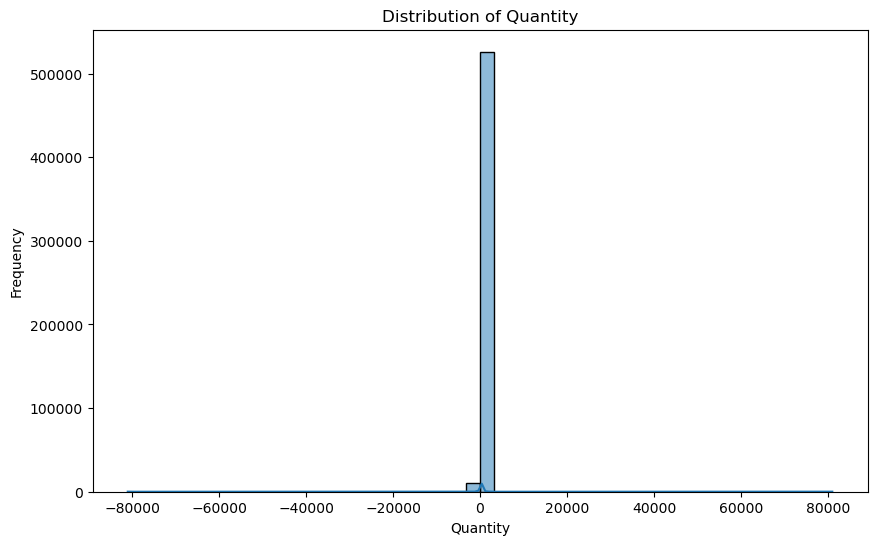

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

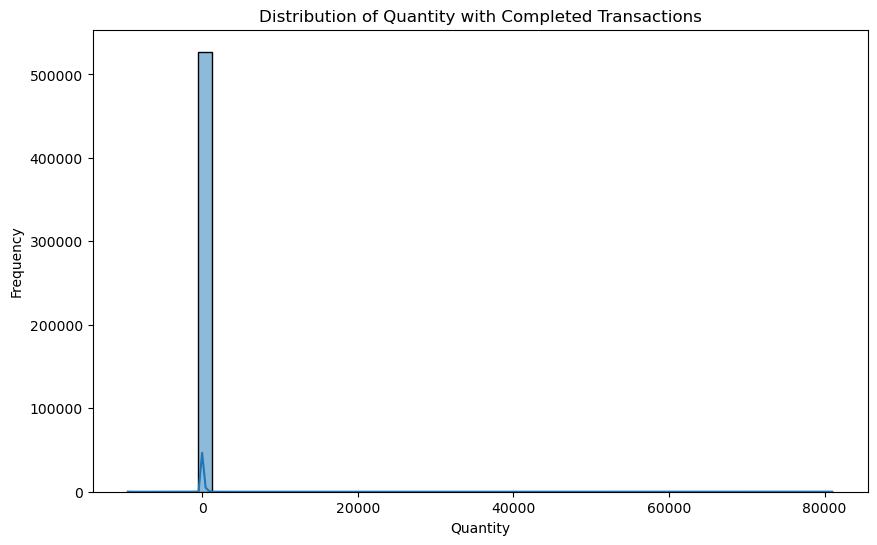

In [128]:
complted_transactions = df[df['Transaction_Status'] == 'Completed']
plt.figure(figsize=(10, 6))
sns.histplot(complted_transactions['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity with Completed Transactions')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

Take a look a extreme values.

In [129]:
df[(df['Quantity'] < -5000) & (df['Transaction_Status'] == 'Completed')]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
115818,546152,72140F,THROW AWAY,-5368,2011-03-09 17:25:00,0.0,<NA>,United Kingdom,Completed
225528,556687,23003,PRINTING SMUDGES/THROWN AWAY,-9058,2011-06-14 10:36:00,0.0,<NA>,United Kingdom,Completed
225529,556690,23005,PRINTING SMUDGES/THROWN AWAY,-9600,2011-06-14 10:37:00,0.0,<NA>,United Kingdom,Completed
225530,556691,23005,PRINTING SMUDGES/THROWN AWAY,-9600,2011-06-14 10:37:00,0.0,<NA>,United Kingdom,Completed


In [130]:
df[df['Description'].str.contains('THROW AWAY', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
115818,546152,72140F,THROW AWAY,-5368,2011-03-09 17:25:00,0.0,<NA>,United Kingdom,Completed
487976,577788,23056,RUSTY THROW AWAY,-210,2011-11-21 16:28:00,0.0,<NA>,United Kingdom,Completed
487977,577789,23057,RUSTY THROW AWAY,-280,2011-11-21 16:28:00,0.0,<NA>,United Kingdom,Completed


Throw away is not a valid transaction, so these need to go. 

In [131]:
df = df[~df['Description'].str.contains('THROW AWAY', na=False)]
df[df['Description'].str.contains('THROW AWAY', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status


We saw some negative quantity in complete transaction.

In [132]:
complted_transactions[complted_transactions['Quantity'] < 0]['Description']
df = df[~((df['Quantity'] < 0) & (df['Transaction_Status'] == 'Completed'))]

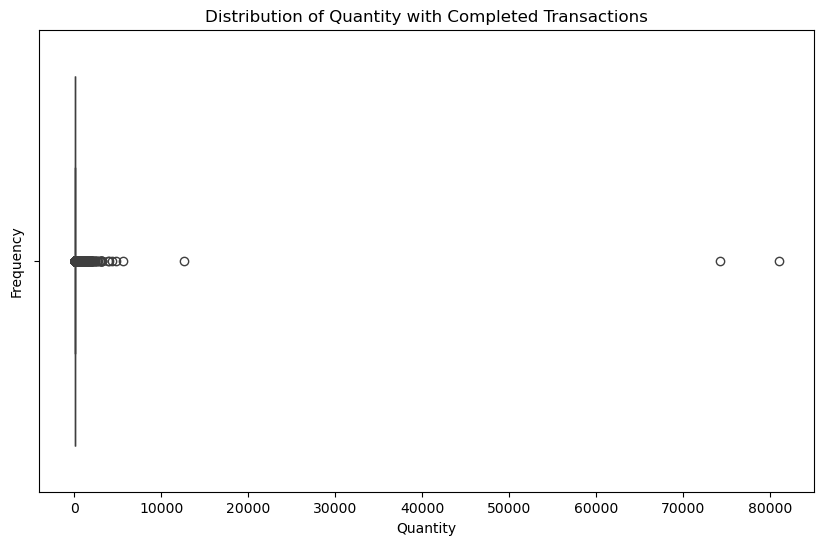

In [133]:
complted_transactions = df[df['Transaction_Status'] == 'Completed']
plt.figure(figsize=(10, 6))
sns.boxplot(data=complted_transactions, x='Quantity')
plt.title('Distribution of Quantity with Completed Transactions')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

Take a look at quantity that larger than 10000

In [134]:
df[df['Quantity']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Completed
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,Completed
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,Completed


In [135]:
df = df[~((df['Quantity'] > 10000) & (df['Transaction_Status'] == 'Completed'))]

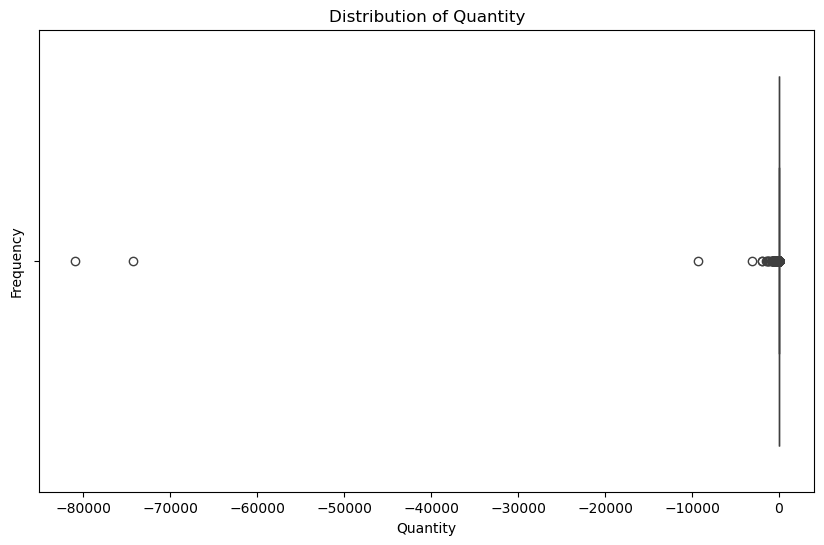

In [136]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']   
plt.figure(figsize=(10, 6))
sns.boxplot(data=cancelled_transactions, x=cancelled_transactions['Quantity'])
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [137]:
df[df['Quantity'] < -9000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,Cancelled
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,Cancelled
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,Cancelled


In [138]:
df = df[~((df['Quantity'] < -9000) & (df['Transaction_Status'] == 'Cancelled'))]

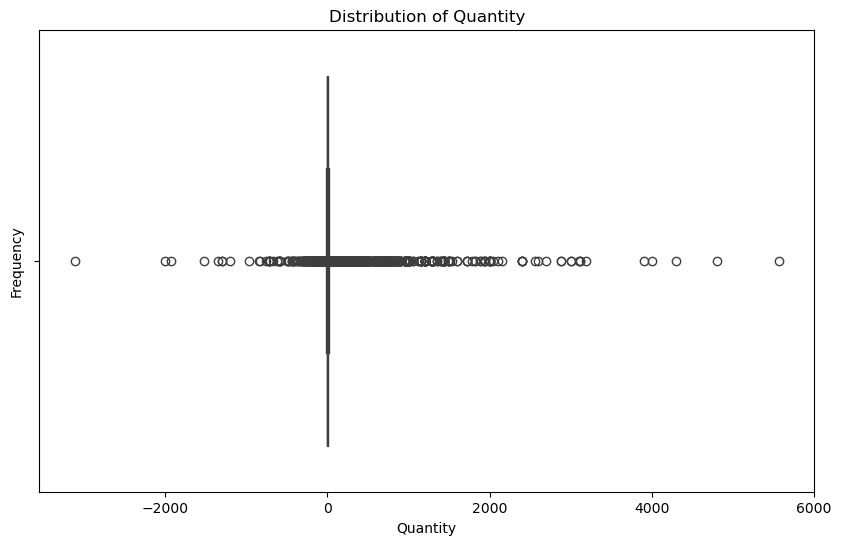

In [139]:
# final plot inspection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Quantity')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


In [140]:
df['Quantity'].describe()   

count    535299.000000
mean         10.024825
std          40.756973
min       -3114.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        5568.000000
Name: Quantity, dtype: float64

Seems like their are still some outliers. <br>
**Things to consider:**: quantities like few thousands, will be consider wholesales not retails. <br>
~~We remove top and botton 95 quantile, since I do not think I have enough domain knowledge to consider which should be consider wholesale and what consider normal retail.~~

Rather than use quantile, I should use Interquartile Range(IQR)

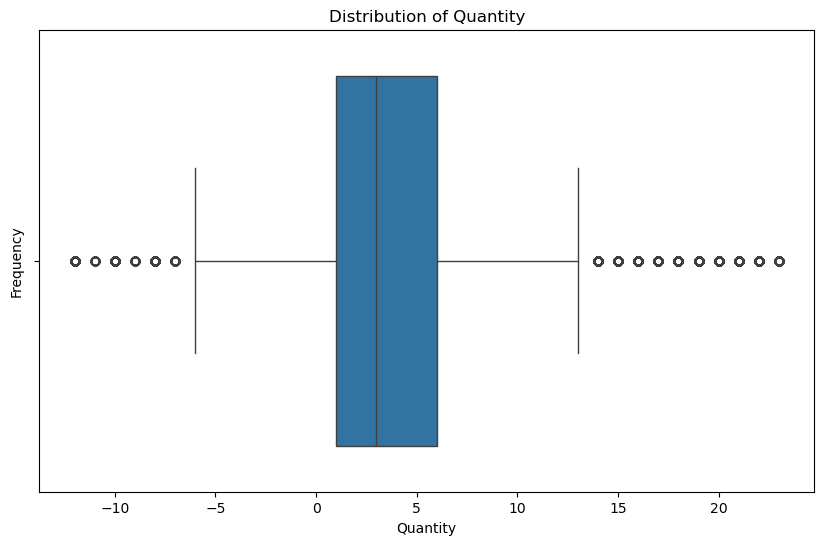

In [141]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]  

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Quantity')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

This is much more balance. 

## Invoice Date

<Axes: xlabel='InvoiceDate', ylabel='Count'>

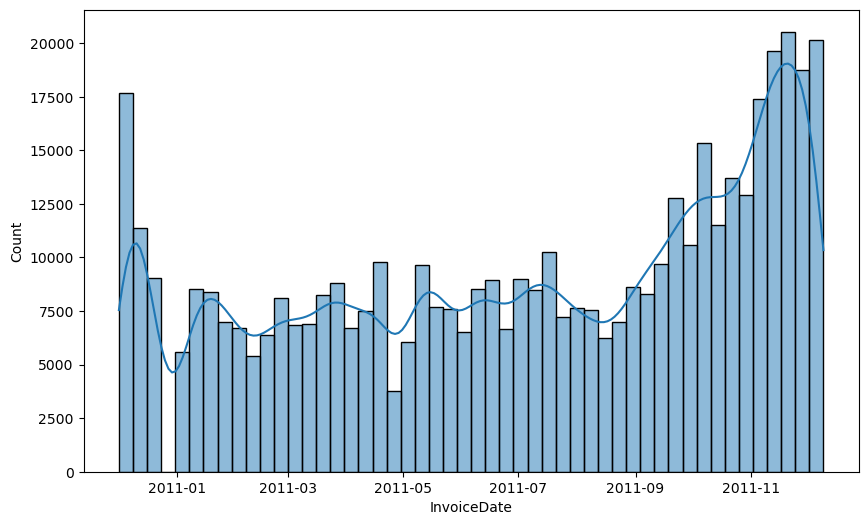

In [142]:
plt.figure(figsize=(10, 6))
sns.histplot(df['InvoiceDate'], bins=50, kde=True)

Gap in christmas holiday seems reasonable. 

<Axes: title={'center': 'Monthly Trend'}, xlabel='Month'>

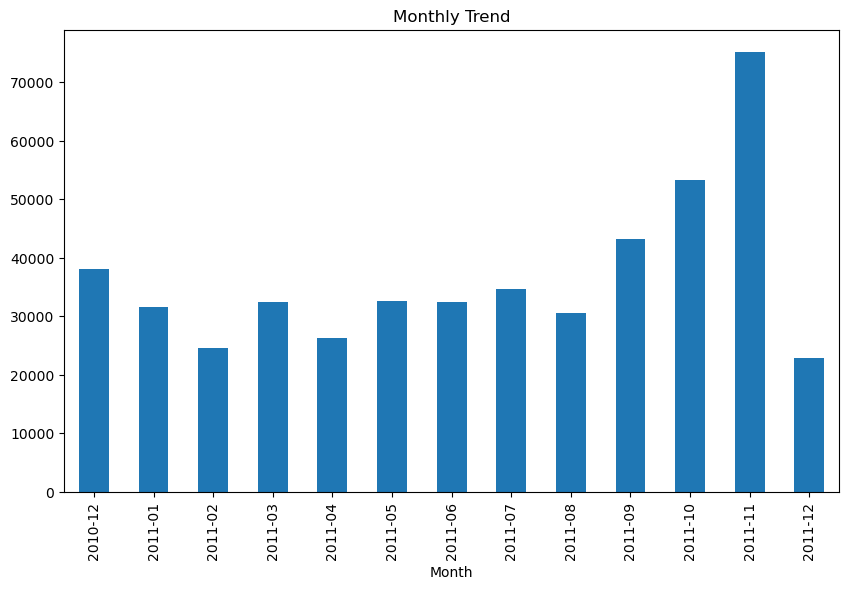

In [143]:
# Create a month column and take a look at monthly trend.
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_trend = df.groupby('Month').size()

monthly_trend.plot(kind='bar', figsize=(10, 6), title='Monthly Trend')

## Unit Price

In [144]:
df.UnitPrice.describe()

count    477707.000000
mean          5.045609
std         103.043421
min      -11062.060000
25%           1.250000
50%           2.460000
75%           4.210000
max       38970.000000
Name: UnitPrice, dtype: float64

Netgative price?

In [145]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Month
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,<NA>,United Kingdom,Completed,2010-12
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,<NA>,United Kingdom,Completed,2010-12
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,<NA>,United Kingdom,Completed,2010-12
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,<NA>,United Kingdom,Completed,2010-12
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,<NA>,United Kingdom,Completed,2010-12
...,...,...,...,...,...,...,...,...,...,...
533712,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,<NA>,United Kingdom,Completed,2011-12
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,<NA>,United Kingdom,Completed,2011-12
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,<NA>,United Kingdom,Completed,2011-12
535334,581211,22142,CHECK,14,2011-12-07 18:36:00,0.0,<NA>,United Kingdom,Completed,2011-12


free and negative?

In [146]:
# Remove the negative and zero unit prices
df = df[df['UnitPrice'] > 0]
# Double check
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Month


## Customer ID


In [147]:
df['CustomerID'].nunique()

4255

## Country

In [148]:
import plotly.express as px

df_country = df['Country'].value_counts().reset_index()
df_country.columns = ['Country', 'Count']

# Create an interactive map
fig = px.choropleth(df_country, 
                    locations="Country", 
                    locationmode="country names",  # Use "ISO-3" for Alpha-3 codes
                    color="Count",  # Values to plot
                    color_continuous_scale="OrRd",  # Color scale
                    title="Transactions by Country")

fig.update_layout(
    title_text="Transactions by Country",
    geo=dict(showframe=False, projection_type='equirectangular'))
    
fig.show()

## Fixing  the CustomerID NaN

For us to make sure that we can use KNN Imputation to replace those Nan CustomerId, we need to make sure that `CustomerID` can inferred based on other features(`InvoideNo`, `Country`, `Quantity` etc.)

### CustomerID VS InvoiceNo

In [149]:
missing_count = df[df['CustomerID'].isnull()].shape[0]
print('The number of missing CustomerID:', missing_count)
print('The percentage of missing CustomerID',missing_count/df.shape[0] * 100)

The number of missing CustomerID: 130642
The percentage of missing CustomerID 27.399575925487046


In [150]:
# Inspect the relationships 

# CustomerId and InvoiceNo, we check whether invoice are corresponds uniquely to a customer
invoice_customer = df.groupby('InvoiceNo')['CustomerID'].nunique()
print(invoice_customer.head())
print('-'*60)
consistent_invoice_customer = invoice_customer[invoice_customer == 1]
print(f'Invoice number that are consistent with a single customer: {len(consistent_invoice_customer)}')
print('The number of all Unique InvoiceNo:', df['InvoiceNo'].nunique())

InvoiceNo
536365    1
536366    1
536367    1
536368    1
536369    1
Name: CustomerID, dtype: int64
------------------------------------------------------------
Invoice number that are consistent with a single customer: 20329
The number of all Unique InvoiceNo: 21923


If `len(consit_invoice_customer) < df['InvoiceNo].nunique()`, it means there are invoices associated with multiple CustomerIDs or have missing CustomerID(we already know)

In [151]:
# Check Invoices with Mutiple CustomerId
inconsisten_invoice = invoice_customer[invoice_customer >1]
print('InvoiceNo with multiple CustomerID:', inconsisten_invoice)

# Check invoice with missing CustomerId
missing_customer_invoice = df[df['CustomerID'].isnull()]['InvoiceNo'].nunique()  
print('Numer of Invoice with missing CustomerId:',missing_customer_invoice)

InvoiceNo with multiple CustomerID: Series([], Name: CustomerID, dtype: int64)
Numer of Invoice with missing CustomerId: 1594


- no `InvoiceNo` with multiple `CustomerID` -> good 
- 1594 `InvoiceNo` with missing `CustomerID` is a lot. -> bad

-> Explore others features. 

### CustomerId Vs. Country

In [152]:
country_customer_counts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print(country_customer_counts.head(10))

Country
United Kingdom    3840
Germany             95
France              87
Spain               30
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64


The distribution of the `Country` are highly imabalanced, the majority of the customer are in UK.<br>
(It make sense, since the dataset is from an actual UK E-commer)

### CustomerId Vs StockCode


In [153]:
product_customer_counts = df.groupby('Description')['CustomerID'].nunique().sort_values(ascending=False)
print(product_customer_counts.head(10))

Description
REGENCY CAKESTAND 3 TIER              882
WHITE HANGING HEART T-LIGHT HOLDER    771
PARTY BUNTING                         671
SET OF 3 CAKE TINS PANTRY DESIGN      622
JUMBO BAG RED RETROSPOT               582
ASSORTED COLOUR BIRD ORNAMENT         576
NATURAL SLATE HEART CHALKBOARD        573
BAKING SET 9 PIECE RETROSPOT          572
SPOTTY BUNTING                        562
JAM MAKING SET WITH JARS              558
Name: CustomerID, dtype: int64


The products are purchased from many customers, so it implies that specific prodcuts are not uniquely tied to individuals customers and likely won't be sufficient for imputation. 
This make sense, since there is no way only one specific customer purchase one specific products. Otherwise, this shop will definitely be bankrup.

### CustomerID Vs Quantity & Products

In [154]:
combo_customer_counts = df.groupby(['StockCode','Quantity'])['CustomerID'].nunique()
print(combo_customer_counts.head(10))

StockCode  Quantity
10002      1            7
           2            4
           3            1
           4            3
           5            2
           6            4
           8            1
           10           1
           11           1
           12          12
Name: CustomerID, dtype: int64


In [155]:
df = df[df['CustomerID'].notnull()]
print('Remaining rows:', len(df))

Remaining rows: 346161


In [156]:
missing_count = df[df['CustomerID'].isnull()].shape[0]
print('The number of missing CustomerID:', missing_count)
print('The percentage of missing CustomerID',missing_count/df.shape[0] * 100)

The number of missing CustomerID: 0
The percentage of missing CustomerID 0.0


It slightly show some relationships but it still overlaps across all customers.

**Conclusion**: Dropping all of the missing CustsomerID.<br>
Reason: we are doing customer segmentation, so if we can not identify these customers, there is no need to keep these values. 

# Feature Engineering 

## Feature Creation
- RMF Features: RMF is a method usef for analyzing customer value and segmenting the customer base. It is an acronym that stands for: Recency(R), Frequency(F), Monetary(M). Together, tese metrics help in understanding a customer's buying behavior and preferences, which is pibotal in personalizing marketing strategies. 

Feature List: 
- **Recency Features**
    - `Days_Since_Last_Purchase`: Measures how recently a customer made a purchase. Useful for identifying active versus dormant customers.
    - `Days_Since_First_Purchase`: Indicates the time since a customer's first purchase, helping to gauge customer lifetime.
    - `Customer_Lifetime`: Represents the duration between a customer's first and last purchase, showing how long they've been actively engaged.

- **Frequency Features**
    - `Total_Transactions`: Counts the total number of transactions a customer has made. Useful for understanding purchasing behavior.
    - `Total_Products`: Measures the total quantity of products a customer has purchased. Indicates purchase volume.
    - `Avg_Frequency`: Shows the average number of transactions per active month, reflecting customer consistency.
    - `Distinct_Products`: Captures the number of unique products purchased by a customer, revealing diversity in their shopping behavior.
    - `Completed_Transactions`: Counts the number of successfully completed transactions, indicating engagement reliability.
    - `Cancelled_Transactions`: Tracks the number of canceled transactions, which may indicate dissatisfaction or logistical issues.
    - `Transaction_Per_Product_Ratio`: Captures the ratio of transactions to total products purchased, which could indicate whether customers purchase in bulk or make frequent small purchases.

- **Monetary Features**
    - `Total_Spend`: The total monetary value spent by the customer. Useful for identifying high-value customers.
    - `Average_Spend`: Calculates the average spend per transaction, reflecting spending tendencies.
    - `Max_Transaction`: Records the highest amount spent in a single transaction, highlighting customers capable of large purchases.
    - `Median_Transaction`: Indicates the median amount spent per transaction, providing a more robust view of spending patterns (less affected by outliers).
    - `Revenue_Contribution`: Calculates the percentage of total revenue contributed by each customer. Helps identify the most valuable customers for the business.
    - `Revenue_Per_Product`: Captures how much customers spend on average per product and provides additional insights into spending efficiency.


### Recency (R)

In [157]:
### Recency (R)

#Days since last purchase
df['InvoiceDate'].dt.date
customer_data = df.groupby('CustomerID')['InvoiceDate'].max().reset_index() 
most_recent_date = df['InvoiceDate'].max()

customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDate']).dt.days
customer_data.drop('InvoiceDate', axis=1, inplace=True)

#First purchase date
first_purchaes_date = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
first_purchaes_date.rename(columns={'InvoiceDate':'First_Purchase_Date'}, inplace=True)

Days_Since_First_Purchase = (most_recent_date - first_purchaes_date['First_Purchase_Date']).dt.days
first_purchaes_date['Days_Since_First_Purchase'] = Days_Since_First_Purchase
first_purchaes_date.drop('First_Purchase_Date', axis=1, inplace=True)

#Customer Lifetime
customer_lifetime = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).reset_index()
customer_lifetime['Customer_Lifetime'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days

customer_data = customer_data.merge(first_purchaes_date, on='CustomerID')
customer_data = customer_data.merge(customer_lifetime[['CustomerID', 'Customer_Lifetime']], on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Days_Since_First_Purchase,Customer_Lifetime
0,12347,1,366,365
1,12348,74,357,282
2,12349,18,18,0
3,12350,309,309,0
4,12352,35,296,260


### Frequency (F)

In [158]:
# Frequency (F)

# Total Transactions
Total_Transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
Total_Transactions.rename(columns={'InvoiceNo':'Total_Transactions'}, inplace=True)

# Total Product Purchased
Total_Products = df[df['Quantity']>0].groupby('CustomerID')['Quantity'].sum().reset_index()
Total_Products.rename(columns={'Quantity':'Total_Products'}, inplace=True)


# Average Frequency Per Month
Active_month = df.groupby('CustomerID')['Month'].nunique().reset_index()
Active_month.rename(columns={'Month':'Active_Months'}, inplace=True)

avg_frequency = Total_Transactions.merge(Active_month, on='CustomerID')
avg_frequency['Avg_Frequency'] = avg_frequency['Total_Transactions'] / avg_frequency['Active_Months']

#Distinct Products
distinct_products = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
distinct_products.rename(columns={'StockCode':'Distinct_Products'}, inplace=True)

# Completed Transactions
completed_transactions = df[df['Transaction_Status'] == 'Completed'].groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
completed_transactions.rename(columns={'InvoiceNo':'Completed_Transactions'}, inplace=True)

# Cancelled Transactions
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled'].groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancelled_transactions.rename(columns={'InvoiceNo':'Cancelled_Transactions'}, inplace=True)

# Merge all frequency related data into customer_data
customer_data = customer_data.merge(Total_Transactions, on='CustomerID', how='left')
customer_data = customer_data.merge(Total_Products, on='CustomerID', how='left')
customer_data = customer_data.merge(avg_frequency[['CustomerID', 'Avg_Frequency']], on='CustomerID', how='left')
customer_data = customer_data.merge(distinct_products, on='CustomerID', how='left')
customer_data = customer_data.merge(completed_transactions, on='CustomerID', how='left')
customer_data = customer_data.merge(cancelled_transactions, on='CustomerID', how='left')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Days_Since_First_Purchase,Customer_Lifetime,Total_Transactions,Total_Products,Avg_Frequency,Distinct_Products,Completed_Transactions,Cancelled_Transactions
0,12347,1,366,365,7,1300.0,1.00,90,7.0,NaN
1,12348,74,357,282,4,29.0,1.00,2,4.0,NaN
2,12349,18,18,0,1,485.0,1.00,68,1.0,NaN
3,12350,309,309,0,1,173.0,1.00,16,1.0,NaN
4,12352,35,296,260,11,536.0,2.75,59,8.0,3.0


In [159]:
customer_data.fillna(0, inplace=True)
customer_data.describe()

,CustomerID,Days_Since_Last_Purchase,Days_Since_First_Purchase,Customer_Lifetime,Total_Transactions,Total_Products,Avg_Frequency,Distinct_Products,Completed_Transactions,Cancelled_Transactions
count,4255.0,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
mean,15295.875206,91.552761,223.152291,131.259224,4.777673,448.674971,1.334549,55.498237,3.992009,0.785664
std,1722.411971,100.729632,118.212453,132.050026,8.634506,929.321963,0.742069,78.968815,7.051422,2.068441
min,12347.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,13808.5,16.000000,112.000000,0.000000,1.000000,86.000000,1.000000,13.000000,1.000000,0.000000
50%,15297.0,49.000000,249.000000,93.000000,2.000000,209.000000,1.000000,31.000000,2.000000,0.000000
75%,16777.5,144.000000,329.000000,252.000000,5.000000,503.000000,1.500000,69.000000,4.000000,1.000000
max,18287.0,373.000000,373.000000,373.000000,244.000000,35713.000000,18.769231,1686.000000,198.000000,47.000000


### Monetary (M)

In [160]:
# Moneraty (M)

#Total Spend
df['Total_Spend'] = df['Quantity'] * df['UnitPrice']
filtered_data = df[df['Quantity'] > 0]
total_spend = filtered_data.groupby('CustomerID')['Total_Spend'].sum().reset_index()
total_spend.rename(columns={'Total_Spend':'Total_Spend'}, inplace=True)

#Average Spend
average_spend = total_spend.merge(Total_Transactions, on='CustomerID')
average_spend['Average_Spend'] = average_spend['Total_Spend'] / average_spend['Total_Transactions']
average_spend = average_spend[['CustomerID', 'Average_Spend']]

# Maximum Transaction
max_transaction = df.groupby('CustomerID')['Total_Spend'].max().reset_index()
max_transaction.rename(columns={'Total_Spend':'Max_Transaction'}, inplace=True)

# Median Transaction 
median_transaction = df.groupby('CustomerID')['Total_Spend'].median().reset_index()
median_transaction.rename(columns={'Total_Spend':'Median_Transaction'}, inplace=True)

# Revenue Contribution
total_revenue =total_spend['Total_Spend'].sum()
total_spend['Revenue_Contribution'] = total_spend['Total_Spend'] / total_revenue

# Merge all monetary related data into customer_data
customer_data = customer_data.merge(total_spend[['CustomerID', 'Total_Spend']], on='CustomerID', how='left')
customer_data = customer_data.merge(average_spend, on='CustomerID', how='left')
customer_data = customer_data.merge(max_transaction, on='CustomerID', how='left')
customer_data = customer_data.merge(median_transaction, on='CustomerID', how='left')
customer_data = customer_data.merge(total_spend[['CustomerID', 'Revenue_Contribution']], on='CustomerID', how='left')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Days_Since_First_Purchase,Customer_Lifetime,Total_Transactions,Total_Products,Avg_Frequency,Distinct_Products,Completed_Transactions,Cancelled_Transactions,Total_Spend,Average_Spend,Max_Transaction,Median_Transaction,Revenue_Contribution
0,12347,1,366,365,7,1300.0,1.00,90,7.0,0.0,3097.82,442.545714,97.8,17.00,0.000673
1,12348,74,357,282,4,29.0,1.00,2,4.0,0.0,377.00,94.250000,240.0,40.00,0.000082
2,12349,18,18,0,1,485.0,1.00,68,1.0,0.0,1626.15,1626.150000,300.0,17.70,0.000353
3,12350,309,309,0,1,173.0,1.00,16,1.0,0.0,314.00,314.000000,40.0,18.75,0.000068
4,12352,35,296,260,11,536.0,2.75,59,8.0,3.0,2506.04,227.821818,376.5,17.40,0.000544


### Fixing Noticed Issues 
- Redundancy: 
    - `Completed_Transaction` and `Cancelled_Transaction` are distinguished to each other, and I am worry that there will be not much insight. 
    - `Max_Transaction`and `Median_Transaction` are overlapping. One highligh biggest spender, and the other give a robust central tendancy less affect by outliers, so I will keep `Median_Transaction`.

- Data Integrity: Ensure negative quantity does not effect features. 
    - Change `df['Quantity]` -> `df[df['Quantity'] > 0]`

In [161]:
# Replace Cancelled_Transaction with Cancelled_Rate
customer_data['Cancelled_Rate'] = customer_data['Cancelled_Transactions'] / (customer_data['Completed_Transactions'] + customer_data['Cancelled_Transactions']).replace(0, np.nan) # Ensure both value are 0
customer_data.drop('Cancelled_Transactions', axis=1, inplace=True)
customer_data.drop('Max_Transaction', axis=1, inplace=True)

# Add additional features
# (M) Revenue Per Product 
customer_data['Revenue_Per_Product'] = customer_data['Total_Spend'] / customer_data['Total_Products']

# (F) Transaction per Product Ratio
customer_data['Transaction_Per_Product_Ratio'] = customer_data['Total_Transactions'] / customer_data['Total_Products']

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Days_Since_First_Purchase,Customer_Lifetime,Total_Transactions,Total_Products,Avg_Frequency,Distinct_Products,Completed_Transactions,Total_Spend,Average_Spend,Median_Transaction,Revenue_Contribution,Cancelled_Rate,Revenue_Per_Product,Transaction_Per_Product_Ratio
0,12347,1,366,365,7,1300.0,1.00,90,7.0,3097.82,442.545714,17.00,0.000673,0.000000,2.382938,0.005385
1,12348,74,357,282,4,29.0,1.00,2,4.0,377.00,94.250000,40.00,0.000082,0.000000,13.000000,0.137931
2,12349,18,18,0,1,485.0,1.00,68,1.0,1626.15,1626.150000,17.70,0.000353,0.000000,3.352887,0.002062
3,12350,309,309,0,1,173.0,1.00,16,1.0,314.00,314.000000,18.75,0.000068,0.000000,1.815029,0.005780
4,12352,35,296,260,11,536.0,2.75,59,8.0,2506.04,227.821818,17.40,0.000544,0.272727,4.675448,0.020522


In [162]:
# Make sure there is no negative quantity
print(customer_data[customer_data['Total_Products'] < 0])

Empty DataFrame
Columns: [CustomerID, Days_Since_Last_Purchase, Days_Since_First_Purchase, Customer_Lifetime, Total_Transactions, Total_Products, Avg_Frequency, Distinct_Products, Completed_Transactions, Total_Spend, Average_Spend, Median_Transaction, Revenue_Contribution, Cancelled_Rate, Revenue_Per_Product, Transaction_Per_Product_Ratio]
Index: []


### Feature Correlation
- Analyzing correlation between features to identifying any strong redundancy.

We can notice that there are numerous high correlation features, which imply multicollinearity. 
I want to keep these for now and see whether we need to use some diemensionallity reduction tool like PCA. 

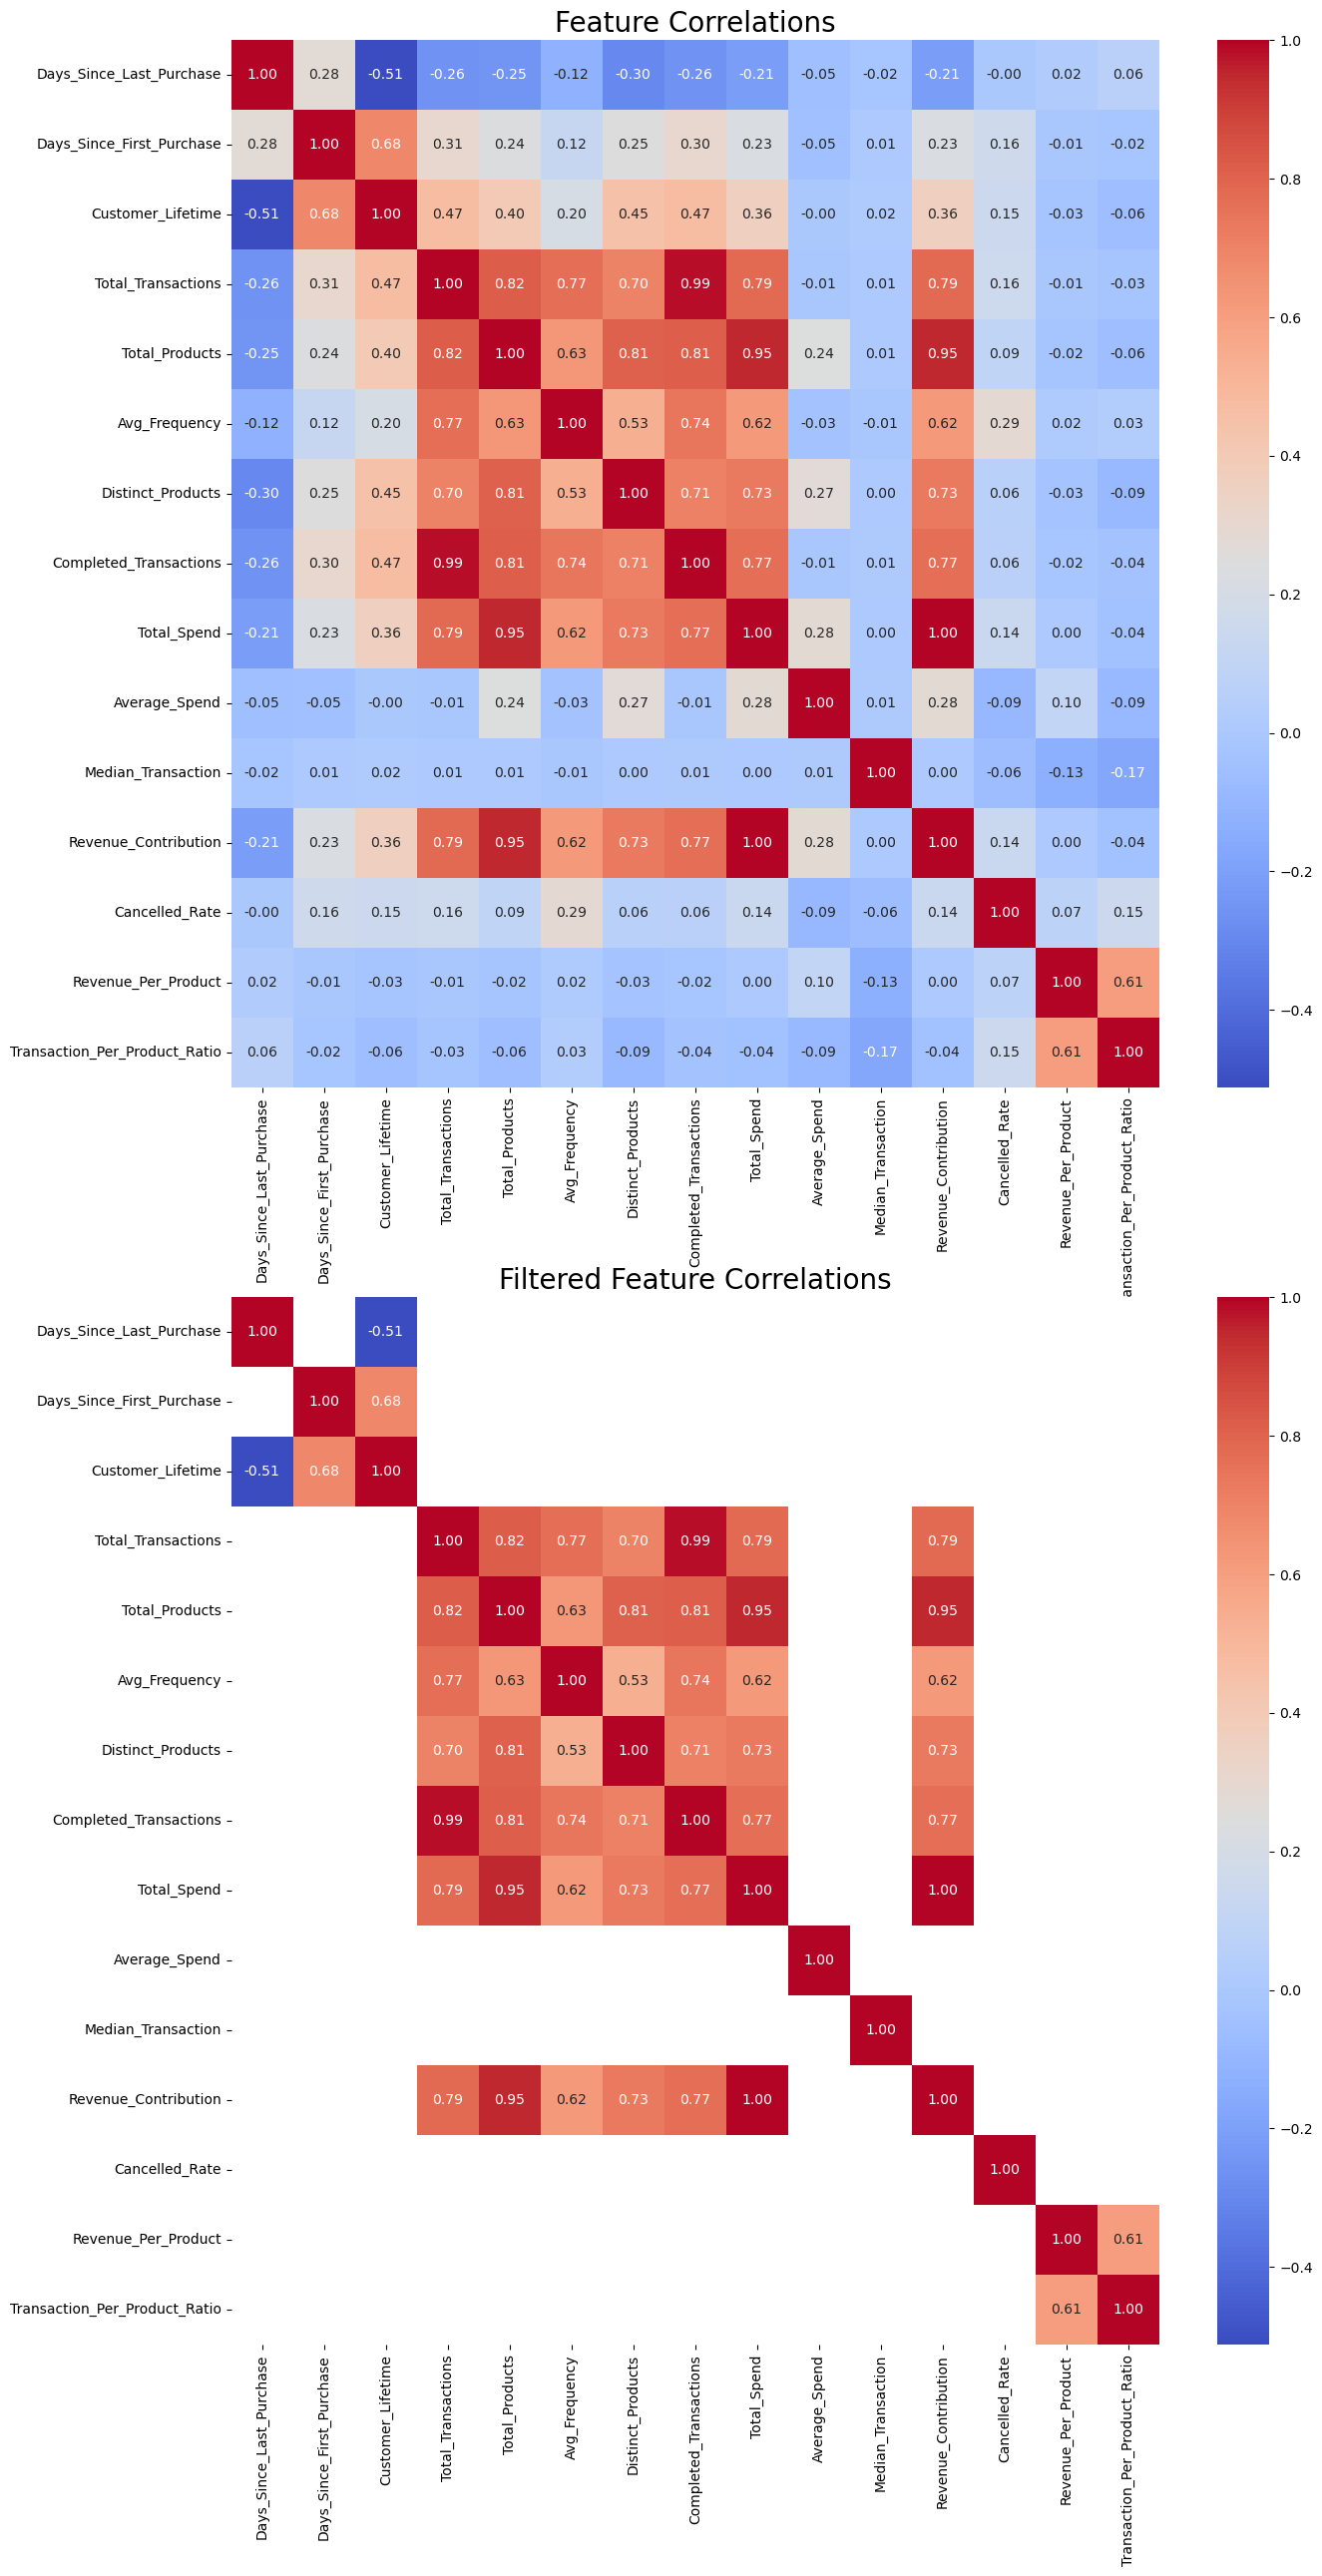

In [163]:
features_corr_matrix = customer_data.drop('CustomerID', axis=1).corr()
filtered_corr_matrix = features_corr_matrix[features_corr_matrix.abs() > 0.5]

fig, ax = plt.subplots(2, 1, figsize=(15, 30))
# Use heatmap
sns.heatmap(features_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, ax=ax[0])
ax[0].set_title('Feature Correlations', fontsize=20)

# Filtered Heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, ax=ax[1])
ax[1].set_title('Filtered Feature Correlations', fontsize=20)

plt.show()


## Feature Scaling 

- **Why Scale Features?**
    - Equal WEighting: Ensure that features with lager ranges (e.g., `Total_Spend`) don't dominate features with smaller ranges(e.g., `Cancelled_Rate`)
    - Model Performance: Gelps algorithms converge faster and improves performance for distance-based models.
    - Improve Interpretability: Scaled data is easier to interpret and compare. 

In [164]:
# Transaction_Per_Product_Ratio have infinite values 
customer_data['Transaction_Per_Product_Ratio'].replace(np.inf, np.nan, inplace=True)
customer_data['Transaction_Per_Product_Ratio'].fillna(0, inplace=True)
mean_value = customer_data['Transaction_Per_Product_Ratio'].mean()
customer_data['Transaction_Per_Product_Ratio'].fillna(mean_value, inplace=True)

print(customer_data['Transaction_Per_Product_Ratio'].isnull().sum())
print(np.isinf(customer_data['Transaction_Per_Product_Ratio']).any())

0
False


C:\Users\oscar\AppData\Local\Temp\ipykernel_210032\3646639970.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\oscar\AppData\Local\Temp\ipykernel_210032\3646639970.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = customer_data.drop('CustomerID', axis=1)

scaled_features = scaler.fit_transform(features_to_scale)
scaled_customer_data = pd.DataFrame(scaled_features, columns=features_to_scale.columns, index=customer_data.index)
scaled_customer_data['CustomerID'] = customer_data['CustomerID']

print(scaled_customer_data.describe())

       Days_Since_Last_Purchase  Days_Since_First_Purchase  Customer_Lifetime  \
count              4.255000e+03               4.255000e+03       4.255000e+03   
mean              -5.844652e-18               6.178632e-17      -3.172811e-17   
std                1.000118e+00               1.000118e+00       1.000118e+00   
min               -9.090028e-01              -1.887944e+00      -9.941282e-01   
25%               -7.501431e-01              -9.403862e-01      -9.941282e-01   
50%               -4.224950e-01               2.186804e-01      -2.897669e-01   
75%                5.207346e-01               8.955076e-01       9.144638e-01   
max                2.794414e+00               1.267763e+00       1.830891e+00   

       Total_Transactions  Total_Products  Avg_Frequency  Distinct_Products  \
count         4255.000000    4.255000e+03   4.255000e+03       4.255000e+03   
mean             0.000000    6.679603e-18  -7.431058e-17      -2.463103e-17   
std              1.000118    1.00

## Dimensionality Reduction
We had detect multicollinearity at the Feature Engineering Stage

In [166]:
from sklearn.decomposition import PCA

# Ensure there are no NaN values
scaled_customer_data.dropna(inplace=True)

# Also ensure there are no Nan values, and prevent uneven number of rows
customer_data.dropna(inplace=True)

pca = PCA()
pca.fit(scaled_customer_data.drop('CustomerID', axis=1))

explained_variance = pca.explained_variance_ratio_
print('Explained Variance:', explained_variance)

cumulative_variance = np.cumsum(explained_variance)
print('Cumulative Variance:', cumulative_variance)

Explained Variance: [4.18111486e-01 1.16328084e-01 1.02405429e-01 8.15692926e-02
 7.96116071e-02 6.05277196e-02 5.08003667e-02 2.95365103e-02
 2.36530151e-02 2.08450622e-02 1.28473420e-02 3.16314269e-03
 6.00624543e-04 3.18061757e-07 7.57719502e-17]
Cumulative Variance: [0.41811149 0.53443957 0.636845   0.71841429 0.7980259  0.85855362
 0.90935399 0.9388905  0.96254351 0.98338857 0.99623591 0.99939906
 0.99999968 1.         1.        ]


In [167]:
n_components = np.argmax(cumulative_variance >= 0.9) + 1
pca = PCA(n_components=n_components)
customer_data_pca = pca.fit_transform(scaled_customer_data.drop('CustomerID', axis=1))
customer_data_pca = pd.DataFrame(customer_data_pca, columns=[f'PC{i+1}' for i in range(customer_data_pca.shape[1])])
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.921746,-0.535674,0.643716,-1.818532,1.156336,-0.096886,-0.405653
1,-0.461108,0.342261,1.720985,-0.524058,0.207825,0.172045,-0.916251
2,-0.146567,-0.607377,-4.986321,-3.150559,2.900458,0.030274,2.030981
3,-1.380212,-0.028755,-0.118004,1.465738,1.938912,-0.096449,-0.155235
4,1.960871,0.242038,0.852907,0.152477,-0.646324,0.164088,0.906521


# Clustering Using K-Means

### Determine the Optimal Number of Clusters
1. Elbow Method: it evaluates the optimal number of clusters (K) by calculating the Within-Cluster Sum of Square for each value of K. The goal is to find the point where adding more clsuters doesn't significantly reduce the WCSS, forming an 'elbow' in the plot.
    - The elbow point (typically where the curve start to flatten) indicates the optimal of clusters. 
    - In the chart, the elbow seem to occur around 3 or clusters.
2. The silhouette method calculates the Silhouette Score ofr each K value, which measures how well-separated and clusters are. The score ranges from -1 (poor clsutering) to 1 (perfect clustring), with higher scores indicating better-defined clusters. 
    - In the chart, score peak at 2 cluster, and stabilizes around 6 or 7 clusters, which appear to have the highest silhouette score after the drop. 

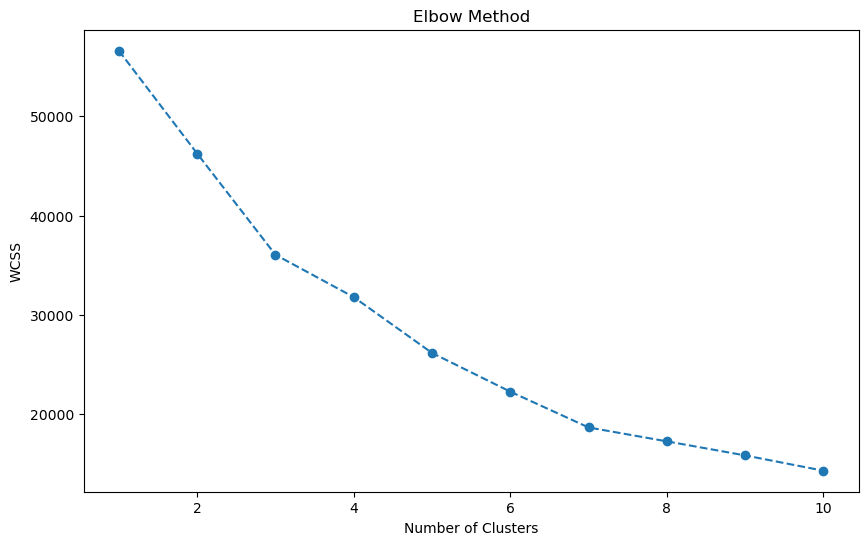

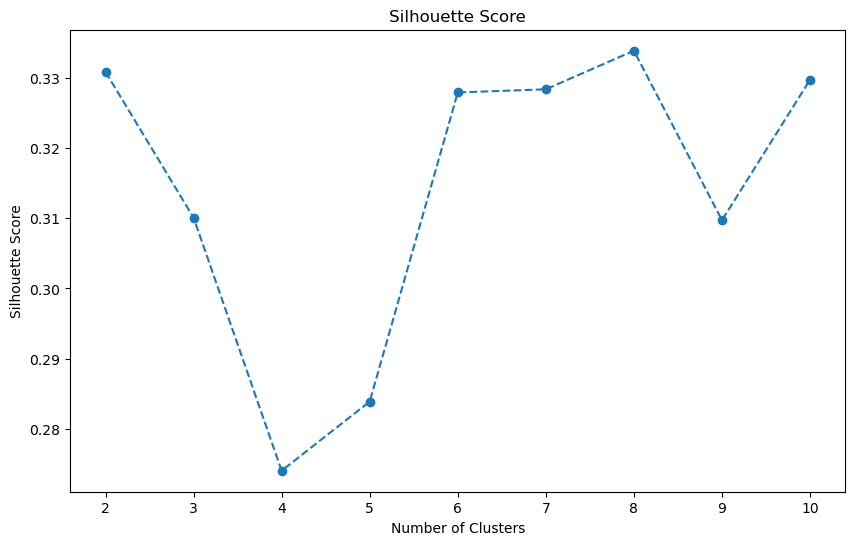

In [168]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Elbow Method
wcss = [] # Within-Cluster Sum of Squares
for it in range(1,11):
    kmeans = KMeans(n_clusters=it, init='k-means++', random_state=42)
    kmeans.fit(customer_data_pca)
    wcss.append(kmeans.inertia_)
    
#plot
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for it in range(2,11):
    kmeans = KMeans(n_clusters=it, init='k-means++', random_state=42)
    kmeans.fit(customer_data_pca)
    score = silhouette_score(customer_data_pca, kmeans.labels_)
    silhouette_scores.append(score)
    
#plot
plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

I will choose use 4 cluster based on Elbow method, for good interpretaility.

### Fit K-Means

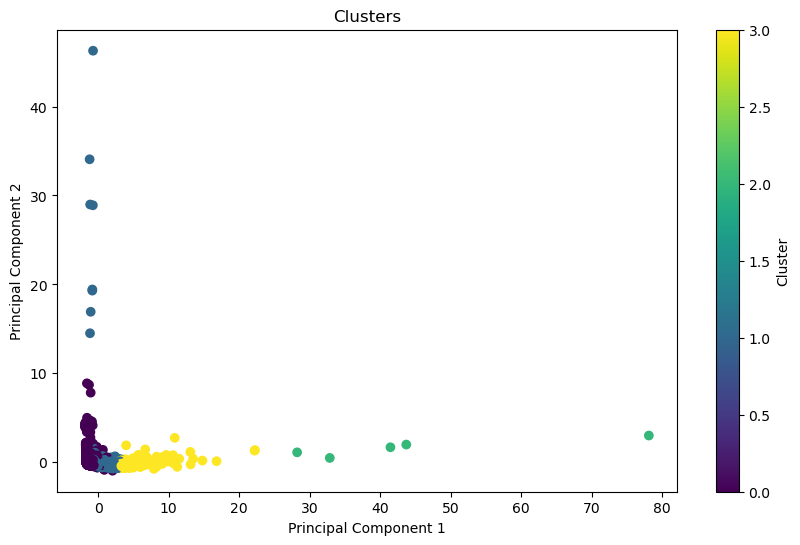

In [194]:
# Fit the model
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(customer_data_pca)

customer_data_pca['Cluster'] = cluster_labels

# Plot
plt.figure(figsize=(10,6))
plt.scatter(customer_data_pca['PC1'], customer_data_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label = 'Cluster')
plt.show()


### Observation:
- There are four distinc clsuters (as determined)
- Some cluster are very tightly packaged, suggesting high similarit among customer in those group. 
- Other clusters are more spread out, indicating greater variation among those customers. 

#### Reason of only plot firt two principal component
- PC1 and PC2 are the first two components that capture the most vriance in the data. By definition: PC1 explains the highest variance, PC2 explain the second-highest variation while being orthogonal(uncorrelated) to PC1. 
- Human can only interpret data visually in 2D (or 3D at most). So, plotting these two provided a simple way to represent multi-dimensional data in a way that is easy to understand. 
- If clusters are distinct and well-seperated in PC1 vs. PC2 space, it often means the clustering algorithm has identified meaningful patterns in the data. 

Now we map clusters back to original data, so we can analyze feature differences. 

In [195]:
#Map cluster to customer data
customer_data['Cluster'] = cluster_labels
cluster_analysis = customer_data.groupby('Cluster').mean()
print(cluster_analysis)

           CustomerID  Days_Since_Last_Purchase  Days_Since_First_Purchase  \
Cluster                                                                      
0        15305.140234                125.979297                 165.094922   
1         15292.87058                 38.456860                 307.205092   
2             14537.0                  1.200000                 317.000000   
3        15213.607595                 11.527426                 337.881857   

         Customer_Lifetime  Total_Transactions  Total_Products  Avg_Frequency  \
Cluster                                                                         
0                38.870312            1.917188      171.803516       1.201634   
1               268.253890            6.526167      585.461810       1.368894   
2               315.400000          152.200000    18430.200000      12.544615   
3               325.864979           22.734177     2317.725738       2.379685   

         Distinct_Products  Completed_Transa

In [196]:
print(customer_data['Cluster'].value_counts())
print(customer_data.head())

Cluster
0    2560
1    1414
3     237
2       5
Name: count, dtype: int64
   CustomerID  Days_Since_Last_Purchase  Days_Since_First_Purchase  \
0       12347                         1                        366   
1       12348                        74                        357   
2       12349                        18                         18   
3       12350                       309                        309   
4       12352                        35                        296   

   Customer_Lifetime  Total_Transactions  Total_Products  Avg_Frequency  \
0                365                   7          1300.0           1.00   
1                282                   4            29.0           1.00   
2                  0                   1           485.0           1.00   
3                  0                   1           173.0           1.00   
4                260                  11           536.0           2.75   

   Distinct_Products  Completed_Transactions  Total_Sp

In [197]:

cluster_percentage = customer_data['Cluster'].value_counts(normalize=True) * 100
cluster_percentage = cluster_percentage.reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Percentage', ascending=False, inplace=True)

print(cluster_percentage)

   Cluster  Percentage
0        0   60.721063
1        1   33.538899
2        3    5.621442
3        2    0.118596


# Feature Analysis, Conclusion, and Actionable Insights. 

C:\Users\oscar\AppData\Local\Temp\ipykernel_210032\117667711.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




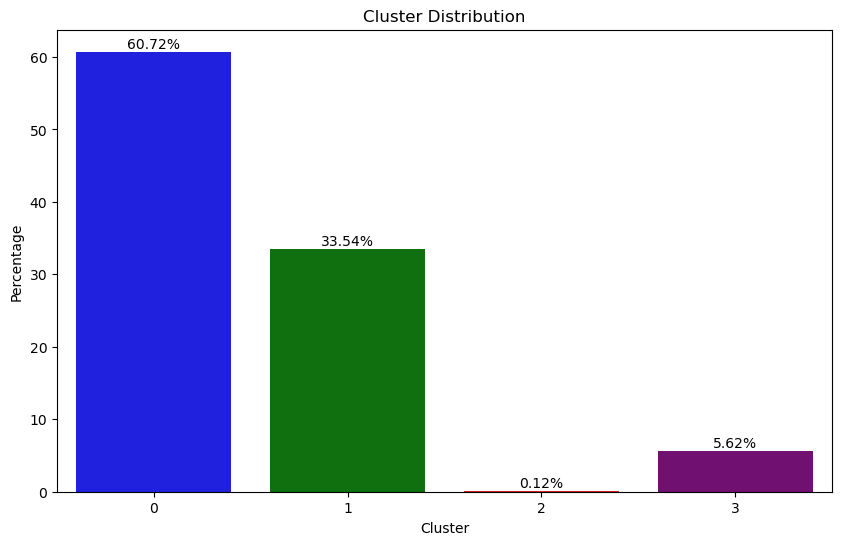

In [219]:
# Visualize distribution of clusters

cluster_percentage = customer_data['Cluster'].value_counts(normalize=True) * 100
cluster_percentage = cluster_percentage.reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Percentage', ascending=False, inplace=True)

color = ['Blue', 'Green', 'Red', 'Purple']

plt.figure(figsize=(10,6))
sns.barplot(data=cluster_percentage, x='Cluster', y='Percentage', palette=color)

for index, row in cluster_percentage.iterrows():
    plt.text(row['Cluster'], row['Percentage'] + 0.5, f'{row["Percentage"]:.2f}%', ha='center')

plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.show()

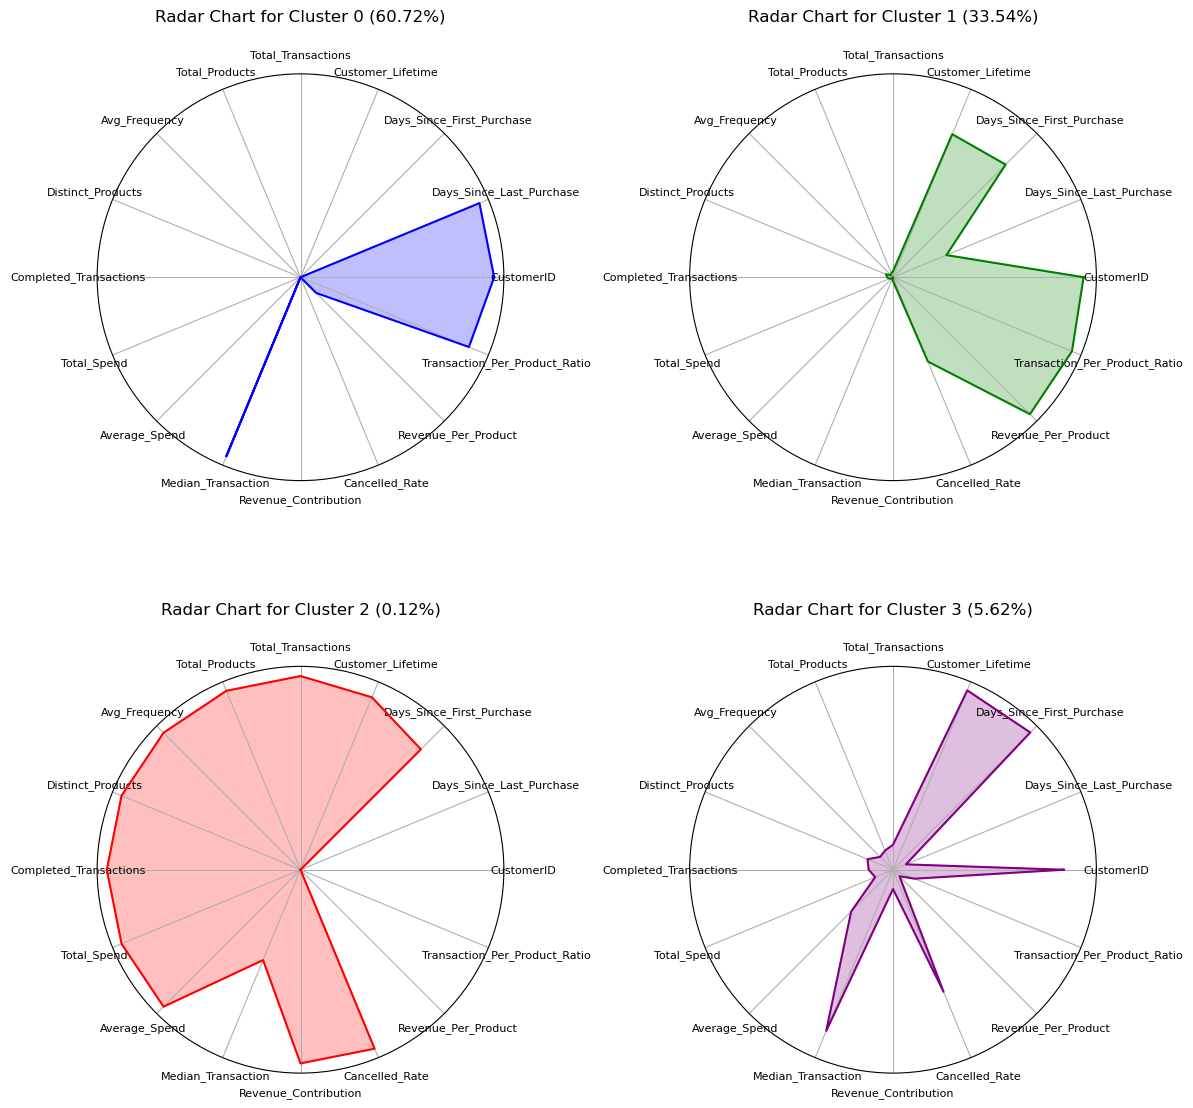

In [226]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm

# Define function to plot radar chart
def plot_radar_charts(data, cluster_labels, title_prefix, color_palette, cluster_percentage):
    # Number of features
    num_vars = len(data.columns)
    
    # Create the angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    # Initialize a 2x2 grid for subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
    axes = axes.flatten()  # Flatten the 2x2 grid for easy iteration
    
    for i, (label, ax) in enumerate(zip(cluster_labels, axes)):
        # Get data for the current cluster
        values = data.iloc[i].tolist()
        values += values[:1]  # Close the loop
                     
        # Plot the radar chart for the cluster
        ax.plot(angles, values, label=f'Cluster {label}', color=color_palette[i])
        ax.fill(angles, values, alpha=0.25, color=color_palette[i])
        
        # Add feature labels at each angle
        ax.set_yticks([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(data.columns, fontsize=8)
        
        # Set title for each radar chart
        percentage = cluster_percentage[cluster_percentage['Cluster'] == label]['Percentage'].values[0]
        ax.set_title(f'{title_prefix} {label} ({percentage:.2f}%)', size=12, pad=20)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Normalize the data
cluster_mean = customer_data.groupby('Cluster').mean()

scaler = MinMaxScaler()
normalized_customer_data = pd.DataFrame(scaler.fit_transform(cluster_mean),
                                        columns=cluster_mean.columns,
                                        index=cluster_mean.index)

# Call the function
plot_radar_charts(normalized_customer_data, normalized_customer_data.index, 'Radar Chart for Cluster', color, cluster_percentage)


### Cluster Profiles:

#### Cluster 0 (60.67%) - **Casual Shoppers / New Customers**
- Key Features:
    - Low transaction frequency, spending, and product diversity.
    - Customer made purchases more recently. (shorter `Days_Since_Last_Purchase`)
    - Low lifetime.
- Profile: **Casual Shoppers** or **new customers** who make occasional purchases with lower spending. 

#### Cluster 1 (33.54%) - **Engaged Customers**
- Key Features: 
    - Moderate transaction frequency and product diveristy. 
    - High transaction-per-product ration, which indicates a focus on fewer, higher-value items. 
    - Relatively high revenue contribution. 
- Profile: These are **engaged customers** who make regular purchases, often of higher-value products. They might represent loyal customers, with significant impact on revenue. 

#### Cluster 2 (0.12%) - **VIPs / High-Value Customers** 
- Key Features:
    - High transaction frequency and spending.
    - Diverse product purchases, high `Distinc_Products`
    - Long lifetime, indicates they have been customers for a long time. 
- Profile: These are **VIP or high-value customers** who consistently contribute significant revenue and have long-standing relationship with the business. 

#### Cluster 3 (5.62%) - **Dormant Customers** 
- Key Features:
    - Inactive Customer, high `Days_Since_Last_Purchase`
    - Low transaction frequency and spending.
    - Low customer lifetime.
- These are **dormant customers** who have been inactive for a long time. They might require re-engagement strategies like target marketing campaign or discount to reactivate their activity. 


### Business Strategy Recommendations:
- **Casual Shoppers / New Customers** <br>
    $\rightarrow $ Focus on convertng these customers into more loyal ones by providing incentives like discounts or loyalty programs. 
- **Engaged Customers** <br>
    $\rightarrow $ Continue engaging these customers with personalized recommendations to maintain their loyalty and spending levels. 
- **VIPs / High-Value Customers** <br> 
    $\rightarrow $ Provide exclusive benefits, early access to new product, or special events to retain and furthur engage these high-value customers. 
- **Dormant Customers** <br>
    $\rightarrow $ Implement re-engagement campaigns (e.g., email campaign, discounts) to reactivate these customers. 